In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [6]:
#import all csv files
train_trans=pd.read_csv("train_transaction.csv")
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_trans=pd.read_csv("test_transaction.csv")
test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_iden = pd.read_csv('train_identity.csv')
train_iden.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
test_iden = pd.read_csv('test_identity.csv')
test_iden.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [10]:
#merge transactions.csv and identity.csv
train_set = pd.merge(train_trans, train_iden, how='left')
train_set.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


<AxesSubplot:>

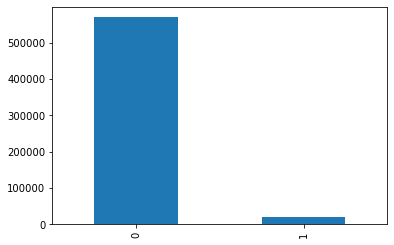

In [11]:
#isFraud distribution in train_set
train_set['isFraud'].value_counts().plot.bar()

In [12]:
#Rename the id-x column in test set to id_x
id_num = [i for i in test_iden.columns if i[0]+i[1] == 'id']
rename_id = {i:'id_'+str(i[-2]+i[-1]) for i in id_num}
test_iden = test_iden.rename(columns=rename_id)
#Merge transections.csv and identity.csv
test_set = test_trans.merge(test_iden,on=['TransactionID'],how='left')
test_set.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#See the missing rate for each column
#Only print the column with missing rate > 85%
train_cols = train_set.columns

missing_rate=[]
for col in train_cols:
    if col != 'isFraud':
        df = pd.concat([train_set[col],test_set[col]],axis=0)
        missing = round((df.isnull().sum()/df.shape[0])*100,2)
        missing_rate.append(missing)
        print(f'missing rate for {col} is {missing}%')
        #if missing >= 86.4:
        #    print(f'missing rate for {col} is {missing}%')

missing rate for TransactionID is 0.0%
missing rate for TransactionDT is 0.0%
missing rate for TransactionAmt is 0.0%
missing rate for ProductCD is 0.0%
missing rate for card1 is 0.0%
missing rate for card2 is 0.0%
missing rate for card3 is 0.0%
missing rate for card4 is 0.0%
missing rate for card5 is 0.0%
missing rate for card6 is 0.0%
missing rate for addr1 is 0.0%
missing rate for addr2 is 0.0%
missing rate for dist1 is 58.65%
missing rate for dist2 is 93.25%
missing rate for P_emaildomain is 0.0%
missing rate for R_emaildomain is 0.0%
missing rate for C1 is 0.0%
missing rate for C2 is 0.0%
missing rate for C3 is 0.0%
missing rate for C4 is 0.0%
missing rate for C5 is 0.0%
missing rate for C6 is 0.0%
missing rate for C7 is 0.0%
missing rate for C8 is 0.0%
missing rate for C9 is 0.0%
missing rate for C10 is 0.0%
missing rate for C11 is 0.0%
missing rate for C12 is 0.0%
missing rate for C13 is 0.43%
missing rate for C14 is 0.0%
missing rate for D1 is 0.67%
missing rate for D2 is 46.99

missing rate for V225 is 76.56%
missing rate for V226 is 76.56%
missing rate for V227 is 74.6%
missing rate for V228 is 76.56%
missing rate for V229 is 76.56%
missing rate for V230 is 76.56%
missing rate for V231 is 76.56%
missing rate for V232 is 76.56%
missing rate for V233 is 76.56%
missing rate for V234 is 74.6%
missing rate for V235 is 76.56%
missing rate for V236 is 76.56%
missing rate for V237 is 76.56%
missing rate for V238 is 74.6%
missing rate for V239 is 74.6%
missing rate for V240 is 76.56%
missing rate for V241 is 76.56%
missing rate for V242 is 76.56%
missing rate for V243 is 76.56%
missing rate for V244 is 76.56%
missing rate for V245 is 74.6%
missing rate for V246 is 76.56%
missing rate for V247 is 76.56%
missing rate for V248 is 76.56%
missing rate for V249 is 76.56%
missing rate for V250 is 74.6%
missing rate for V251 is 74.6%
missing rate for V252 is 76.56%
missing rate for V253 is 76.56%
missing rate for V254 is 76.56%
missing rate for V255 is 74.6%
missing rate for

In [ ]:
#preprocess

In [13]:
cat_cols = (['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
             'addr1', 'addr2', 
             'P_emaildomain', 'R_emaildomain', 
             'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
             'DeviceType', 'DeviceInfo', 
             'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'])

In [14]:
type_map = {c: str for c in cat_cols}

In [15]:
train_set[cat_cols] = train_set[cat_cols].astype(type_map, copy=False)

In [16]:
test_set[cat_cols] = test_set[cat_cols].astype(type_map, copy=False)

In [17]:
id_cols = ['TransactionID', 'TransactionDT']

In [18]:
y_train_ = train_set['isFraud']
X_train = train_set.drop(columns=['isFraud'])
X_test = test_set.copy()

In [19]:
print(X_train.shape)
print(X_test.shape)

(590540, 433)
(506691, 433)


In [20]:
for col in X_train.columns:
    if col in cat_cols:
        # label encode all cat columns
        dff = pd.concat([X_train[col],X_test[col]])
        dff,_ = pd.factorize(dff,sort=True)
        if dff.max()>32000: 
            print(col,'needs int32 datatype')
            
        X_train[col] = dff[:len(X_train)].astype('int16')
        X_test[col] = dff[len(X_train):].astype('int16')

In [21]:
cols = X_train.columns
for col in cols:
    if col not in cat_cols and col not in id_cols:
        # min max scalar
        dff = pd.concat([X_train[col],X_test[col]])
        dff = (dff - dff.min())/(dff.max() - dff.min())
        dff.fillna(-1,inplace=True)

        X_train[col] = dff[:len(X_train)]
        X_test[col] = dff[len(X_train):]

In [64]:
split=int(X_train.shape[0]*0.8)

In [65]:
train_index = X_train.index[:split]  
validation_index = X_train.index[split:]

In [66]:
#x_train,y_train = X_train.iloc[idx_train],y_train_.iloc[idx_train]
x_train = X_train.iloc[train_index]

In [67]:
y_train = y_train_.iloc[train_index]

In [68]:
#x_cv_,y_cv = X_train.iloc[idx_validation],y_train_.iloc[idx_validation]
x_cv_ = X_train.iloc[validation_index]

In [69]:
y_cv = y_train_.iloc[validation_index]

In [70]:
print(x_train.shape)
print(x_cv_.shape)
print(y_train.shape)
print(y_cv.shape)

(472432, 433)
(118108, 433)
(472432,)
(118108,)


In [71]:
model = RandomForestClassifier()

In [72]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_train_pred = model.predict(x_train)

In [74]:
y_test_pred = model.predict(x_cv_)

In [75]:
rf_train_fpr, rf_train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])

In [76]:
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(y_cv, model.predict_proba(x_cv_)[:,1])

In [77]:
rf_train_auc = auc(rf_train_fpr, rf_train_tpr)
rf_test_auc = auc(rf_test_fpr, rf_test_tpr)

In [78]:
print('Area under train roc {}'.format(rf_train_auc))
print('Area under test roc {}'.format(rf_test_auc))

Area under train roc 1.0
Area under test roc 0.8897841646696938


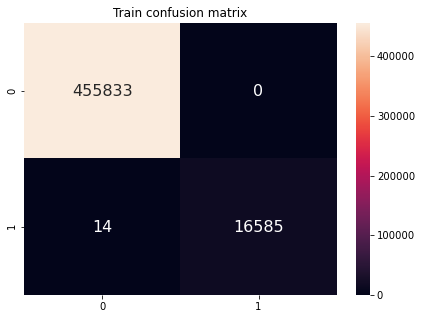

In [79]:
train_cf = confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Train confusion matrix')
plt.show()

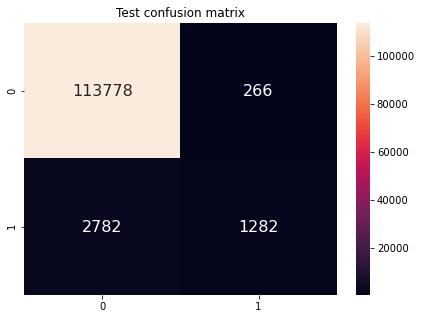

In [80]:
cv_cf = confusion_matrix(y_cv,y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cv_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()

In [81]:
#Logistic
from sklearn.linear_model import LogisticRegression

In [82]:
clf = LogisticRegression(solver='liblinear',class_weight='balanced',random_state=0)

In [83]:
clf.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=0, solver='liblinear')

In [84]:
log_y_train_pred = clf.predict(x_train)

In [85]:
log_y_test_pred = clf.predict(x_cv_)

In [86]:
log_train_fpr, log_train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])

In [87]:
log_test_fpr, log_test_tpr, thresholds = roc_curve(y_cv, clf.predict_proba(x_cv_)[:,1])

In [88]:
log_train_auc = auc(log_train_fpr, log_train_tpr)
log_test_auc = auc(log_test_fpr, log_test_tpr)

In [89]:
print('Area under train roc {}'.format(log_train_auc))
print('Area under test roc {}'.format(log_test_auc))

Area under train roc 0.8063236117136032
Area under test roc 0.7969162622203836


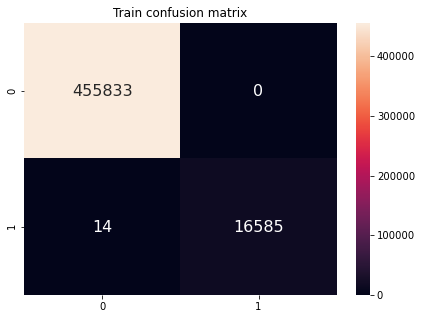

In [90]:
log_train_cf = confusion_matrix(y_train,log_y_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Train confusion matrix')
plt.show()

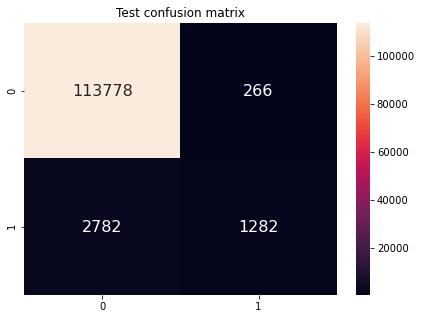

In [91]:
log_cv_cf = confusion_matrix(y_cv,log_y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cv_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()